<a href="https://colab.research.google.com/github/Suniksha12/Wine_Quality/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grapes to Greatness: Machine Learning in Wine Quality Prediction


# Task 1 : to load Dataset

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as rcparams
import seaborn as sns


In [97]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
df.columns = [c.replace(' ', '_') for c in df.columns]

# Task 2 : data preprocessing including visulaizations

In [99]:
df.shape

(1599, 12)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [101]:
df.isnull().sum() #no null values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [102]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [103]:
df.corr().quality.sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

univariate analysis

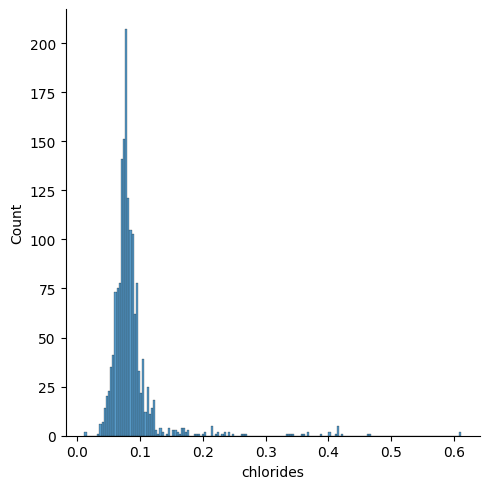

In [104]:
sns.displot(df.chlorides)

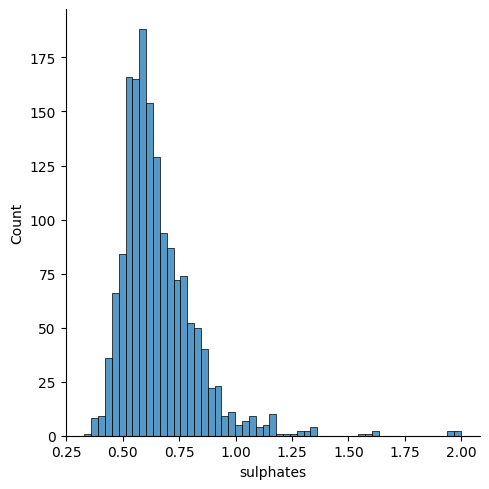

In [105]:
sns.displot(df.sulphates)

bivariate analysis


<Axes: xlabel='sulphates', ylabel='pH'>

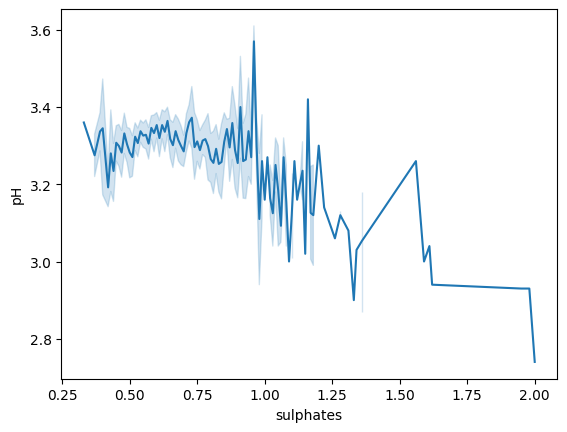

In [106]:
sns.lineplot(x=df.sulphates, y=df.pH)

<Axes: xlabel='alcohol', ylabel='pH'>

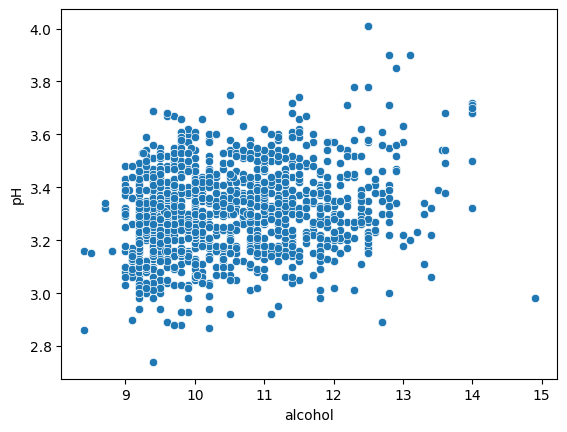

In [107]:
sns.scatterplot(x=df.alcohol, y=df.pH)

multivariate analysis

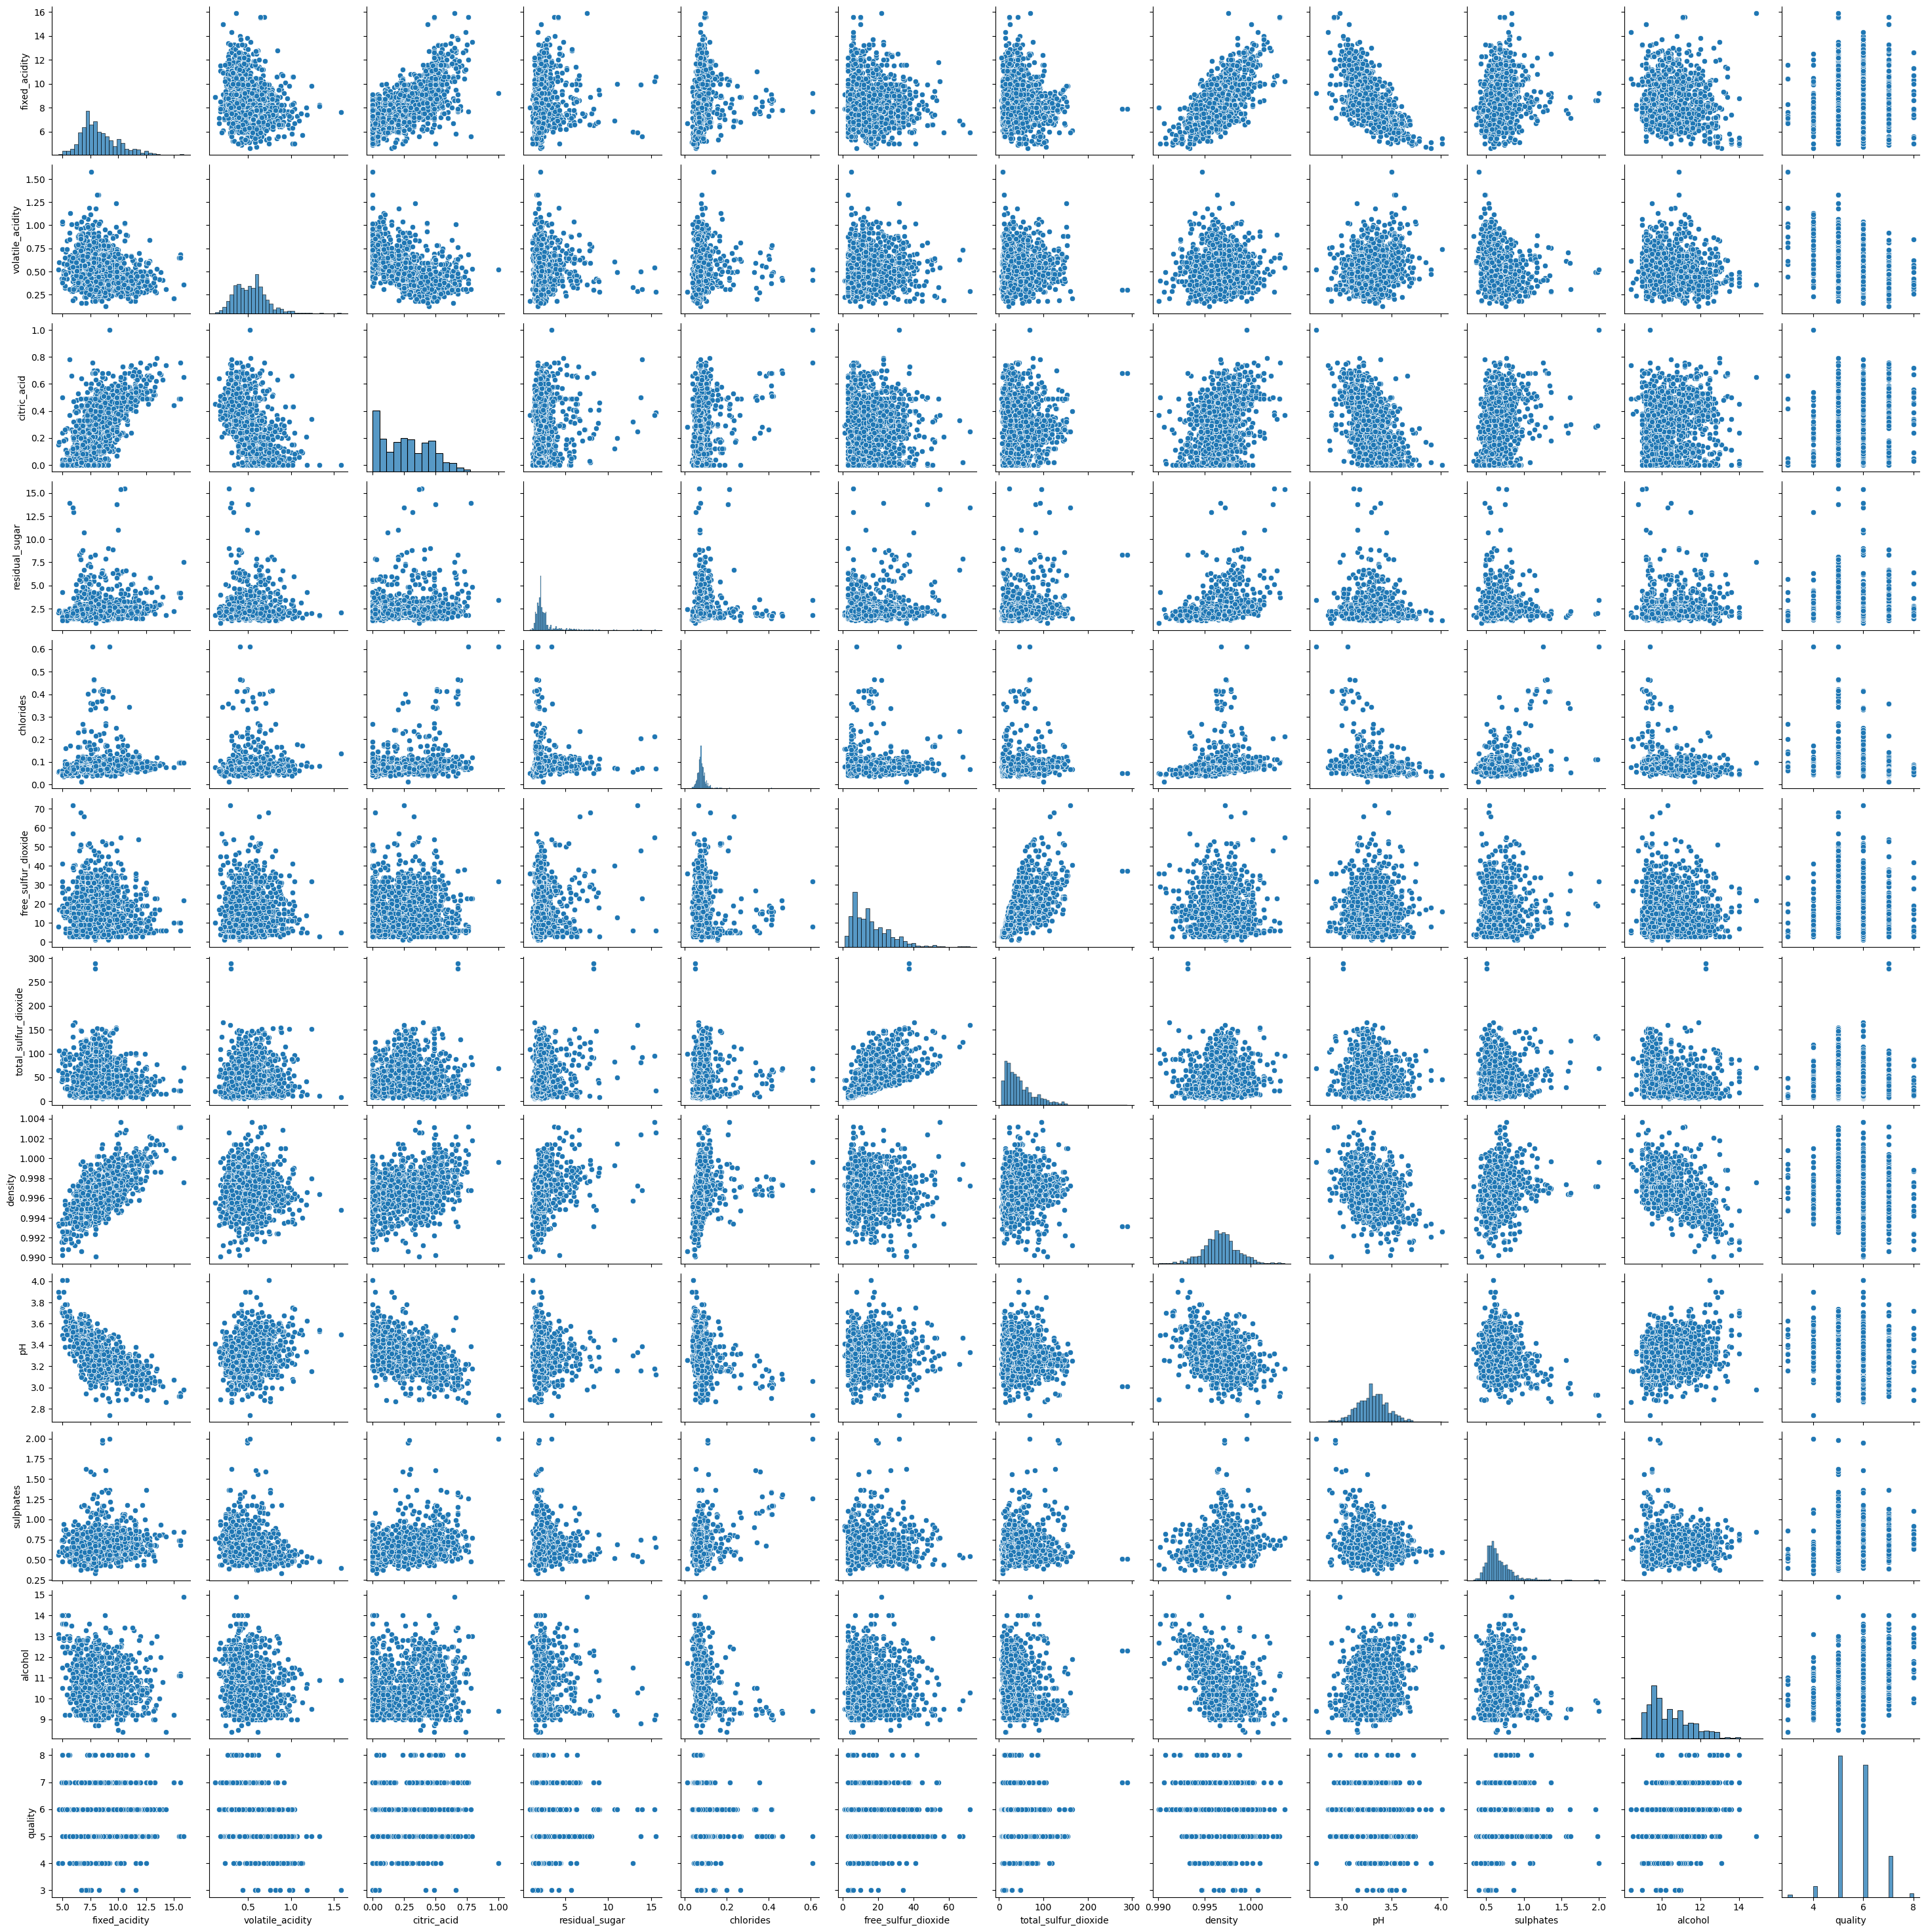

In [108]:
sns.pairplot(df)

In [109]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

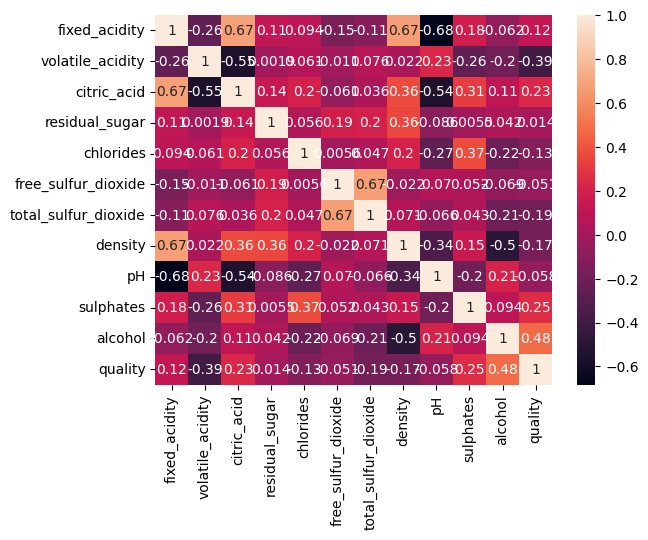

In [110]:
sns.heatmap(df.corr(),annot = True)

Outlier detection and removal by percentile method and IQR method

In [111]:
df.iloc[:30]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<Axes: >

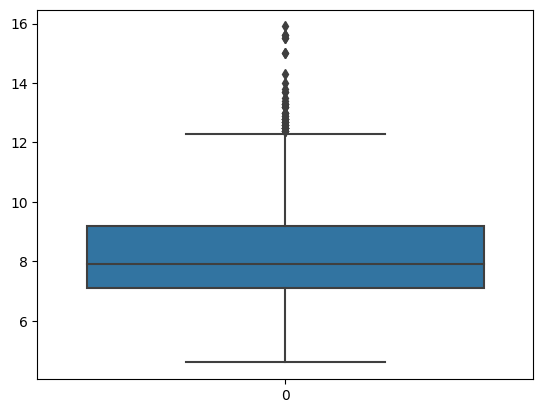

In [112]:
sns.boxplot(df.fixed_acidity) #outliers detected

In [113]:
#removing outliers
f1 = df.fixed_acidity.quantile(0.25) #Q1
f3 = df.fixed_acidity.quantile(0.75) #Q3
IQR_f = f3 - f1
upper_limit_f = f3+(1.5)*(IQR_f)
lower_limit_f = f1-(1.5)*(IQR_f)
print(f1)
print(f3)
print(IQR_f)
print(upper_limit_f)
print(lower_limit_f)

7.1
9.2
2.0999999999999996
12.349999999999998
3.95


<Axes: >

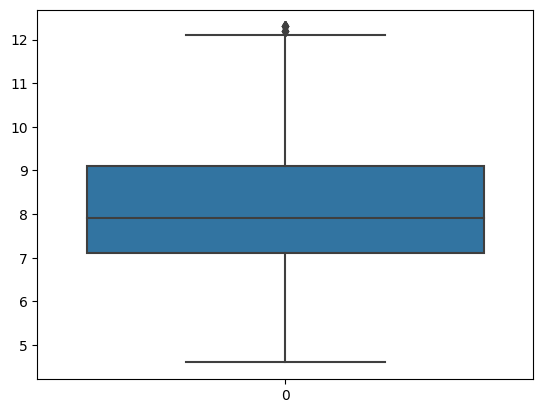

In [114]:
df=df[(df.fixed_acidity<upper_limit_f) & (df.fixed_acidity>lower_limit_f)]
sns.boxplot(df.fixed_acidity)

In [115]:
fa_01=df.fixed_acidity.quantile(0.01)
fa_9=df.fixed_acidity.quantile(0.98)
print(fa_01)
print(fa_9)

5.2
11.8


<Axes: >

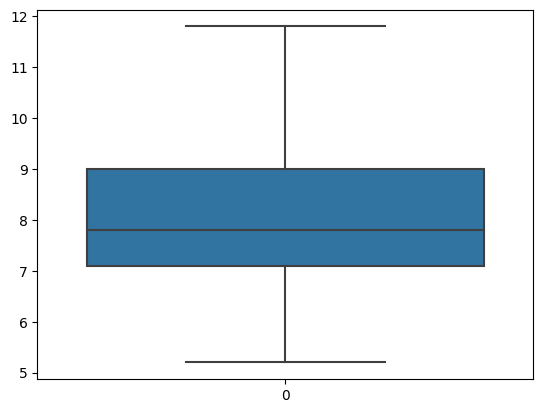

In [116]:
df=df[(df.fixed_acidity>=fa_01) & (df.fixed_acidity<=fa_9)]
sns.boxplot(df.fixed_acidity)

<Axes: >

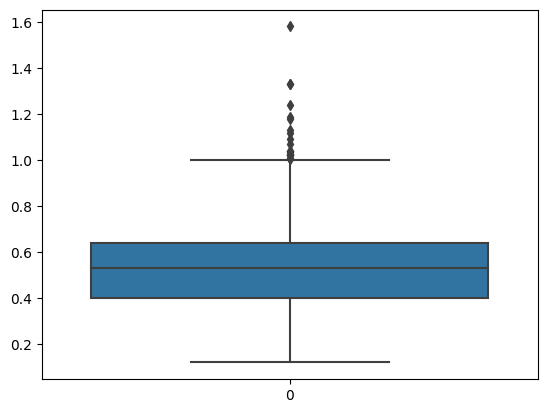

In [117]:
sns.boxplot(df.volatile_acidity) #outlier detected

In [118]:
#removing outliers
v1 = df.volatile_acidity.quantile(0.25) #Q1
v3 = df.volatile_acidity.quantile(0.75) #Q3
IQR_v = v3 - v1
upper_limit_v = v3+(1.5)*(IQR_v)
lower_limit_v = v1-(1.5)*(IQR_v)
print(v1)
print(v3)
print(IQR_v)
print(upper_limit_v)
print(lower_limit_v)

0.4
0.64
0.24
1.0
0.040000000000000036


<Axes: >

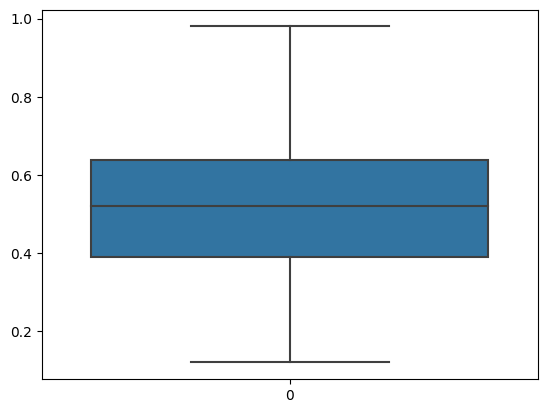

In [119]:
df=df[(df.volatile_acidity<upper_limit_v) & (df.volatile_acidity>lower_limit_v)]
sns.boxplot(df.volatile_acidity)

<Axes: >

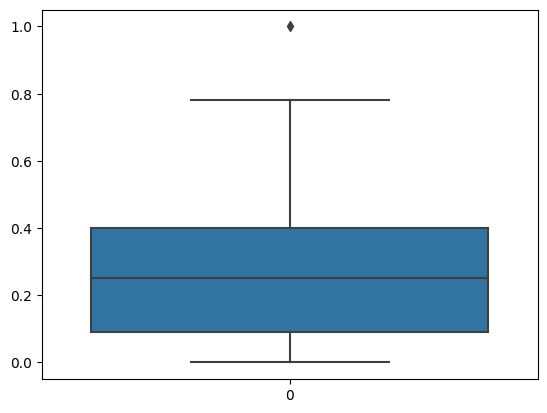

In [120]:
 sns.boxplot(df.citric_acid) #outlier detected

In [121]:
#removing outlier

c1 = df.citric_acid.quantile(0.25) #Q1
c3 = df.citric_acid.quantile(0.75) #Q3
IQR_c = c3 - c1
upper_limit_c = c3+(1.5)*(IQR_c)
lower_limit_c = c1-(1.5)*(IQR_c)
print(c1)
print(c3)
print(IQR_c)
print(upper_limit_c)
print(lower_limit_c)

0.09
0.4
0.31000000000000005
0.8650000000000001
-0.3750000000000001


<Axes: >

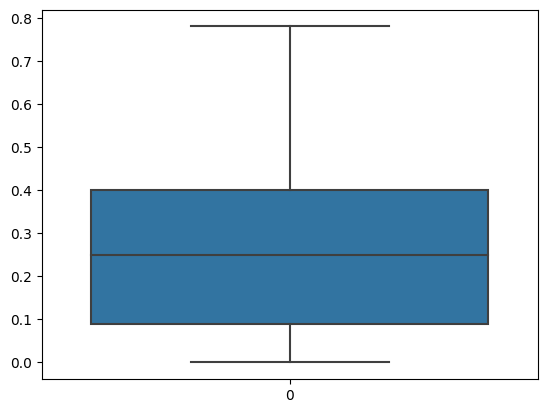

In [122]:
df=df[(df.citric_acid<upper_limit_c) & (df.citric_acid>lower_limit_c)]
sns.boxplot(df.citric_acid)

<Axes: >

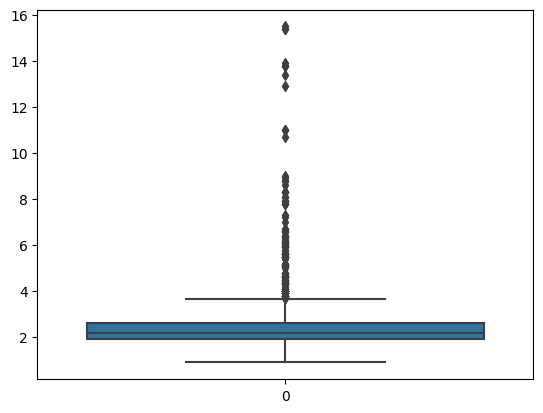

In [123]:
sns.boxplot(df.residual_sugar) #outlier detected

In [124]:
r1 = df.residual_sugar.quantile(0.25) #Q1
r3 = df.residual_sugar.quantile(0.75) #Q3
IQR_r = r3 - r1
upper_limit_r = r3+(1.5)*(IQR_r)
lower_limit_r = r1-(1.5)*(IQR_r)
print(r1)
print(r3)
print(IQR_r)
print(upper_limit_r)
print(lower_limit_r)

1.9
2.6
0.7000000000000002
3.6500000000000004
0.8499999999999996


<Axes: >

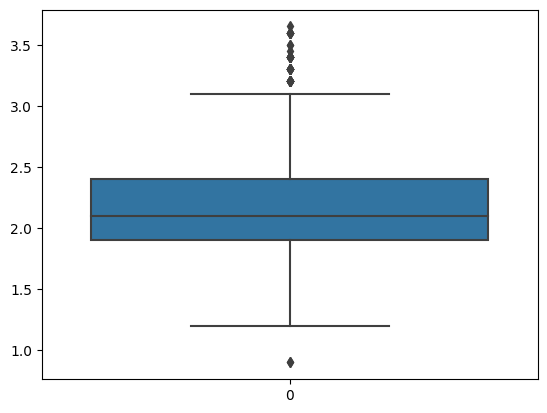

In [125]:
df=df[(df.residual_sugar<upper_limit_r) & (df.residual_sugar>lower_limit_r)]
sns.boxplot(df.residual_sugar)

In [126]:
rs_02=df.residual_sugar.quantile(0.02)
rs_96=df.residual_sugar.quantile(0.96)
print(rs_02)
print(rs_96)

1.4
3.0


<Axes: >

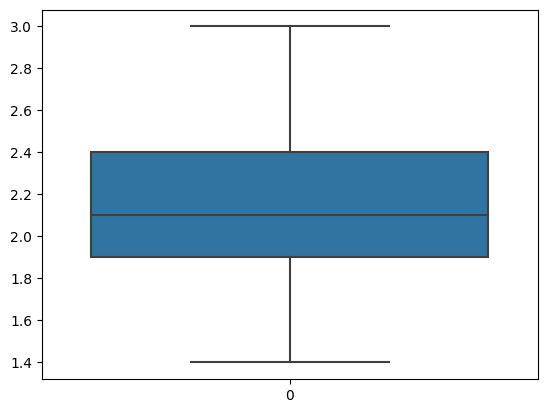

In [127]:
df=df[(df.residual_sugar>=rs_02) & (df.residual_sugar<=rs_96)]
sns.boxplot(df.residual_sugar)

<Axes: >

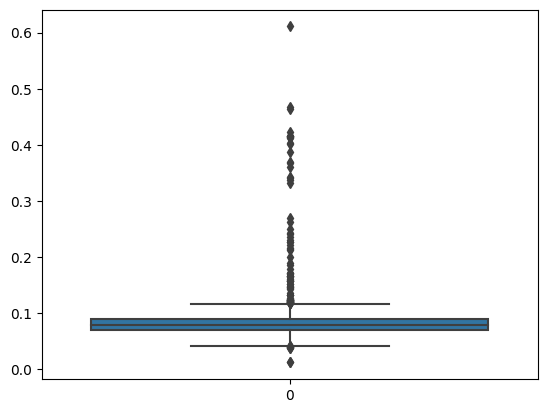

In [128]:
sns.boxplot(df.chlorides) #outliers detected

In [129]:
#removing outliers
ch1 = df.chlorides.quantile(0.25) #Q1
ch3 = df.chlorides.quantile(0.75) #Q3
IQR_ch = ch3 - ch1
upper_limit_ch = ch3+(1.5)*(IQR_ch)
lower_limit_ch = ch1-(1.5)*(IQR_ch)
print(ch1)
print(ch3)
print(IQR_ch)
print(upper_limit_ch)
print(lower_limit_ch)

0.07
0.089
0.01899999999999999
0.11749999999999998
0.04150000000000002


<Axes: >

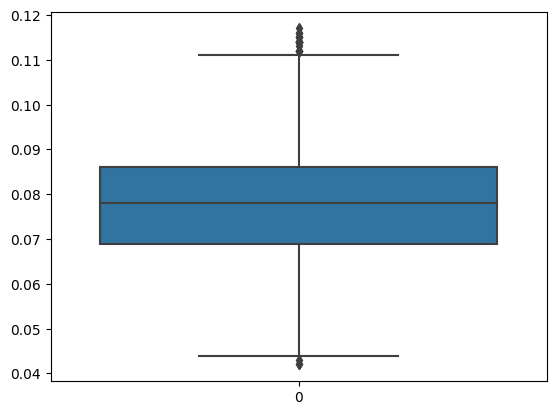

In [130]:
df=df[(df.chlorides<upper_limit_ch) & (df.chlorides>lower_limit_ch)]
sns.boxplot(df.chlorides)

In [131]:
ch_01=df.chlorides.quantile(0.01)
ch_97=df.chlorides.quantile(0.97)
print(ch_01)
print(ch_97)

0.047
0.107


<Axes: >

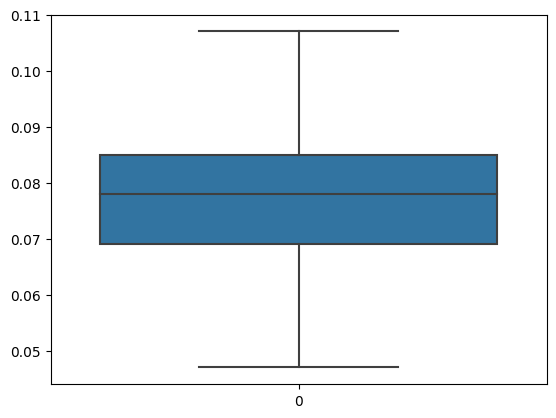

In [132]:
df=df[(df.chlorides>=ch_01) & (df.chlorides<=ch_97)]
sns.boxplot(df.chlorides)

<Axes: >

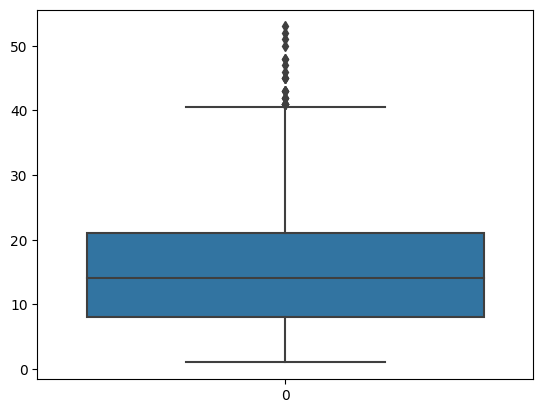

In [133]:
sns.boxplot(df.free_sulfur_dioxide) #outliers detcted

In [134]:
#removing outliers
fs1 = df.free_sulfur_dioxide.quantile(0.25) #Q1
fs3 = df.free_sulfur_dioxide.quantile(0.75) #Q3
IQR_fs = fs3 - fs1
upper_limit_fs = fs3+(1.5)*(IQR_fs)
lower_limit_fs = fs1-(1.5)*(IQR_fs)
print(fs1)
print(fs3)
print(IQR_fs)
print(upper_limit_fs)
print(lower_limit_fs)

8.0
21.0
13.0
40.5
-11.5


<Axes: >

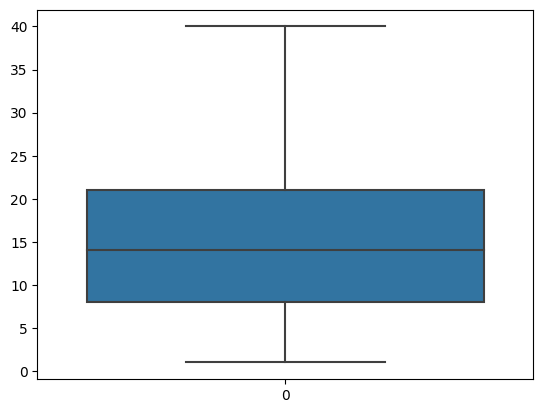

In [135]:
df=df[(df.free_sulfur_dioxide<upper_limit_fs) & (df.free_sulfur_dioxide>lower_limit_fs)]
sns.boxplot(df.free_sulfur_dioxide)

<Axes: >

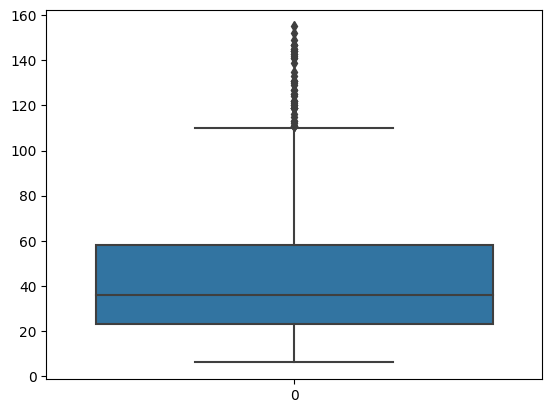

In [136]:
sns.boxplot(df.total_sulfur_dioxide) #outlier detcted

In [137]:
#removing outliers
ts1 = df.total_sulfur_dioxide.quantile(0.25) #Q1
ts3 = df.total_sulfur_dioxide.quantile(0.75) #Q3
IQR_ts = ts3 - ts1
upper_limit_ts = ts3+(1.5)*(IQR_ts)
lower_limit_ts = ts1-(1.5)*(IQR_ts)
print(ts1)
print(ts3)
print(IQR_ts)
print(upper_limit_ts)
print(lower_limit_ts)

23.0
58.0
35.0
110.5
-29.5


<Axes: >

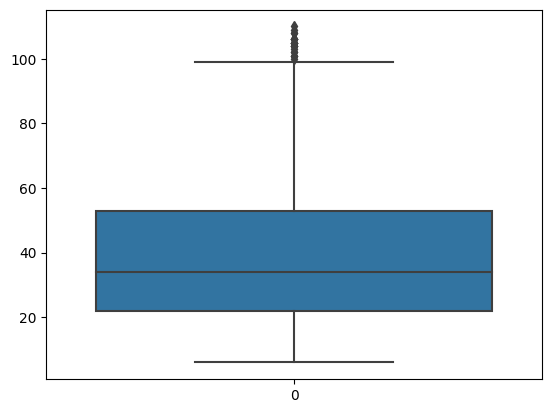

In [138]:
df=df[(df.total_sulfur_dioxide<upper_limit_ts) & (df.total_sulfur_dioxide>lower_limit_ts)]
sns.boxplot(df.total_sulfur_dioxide)

In [148]:
ts_01=df.total_sulfur_dioxide.quantile(0.01)
ts_78=df.total_sulfur_dioxide.quantile(0.78)
print(ts_01)
print(ts_78)

9.06
41.0


<Axes: >

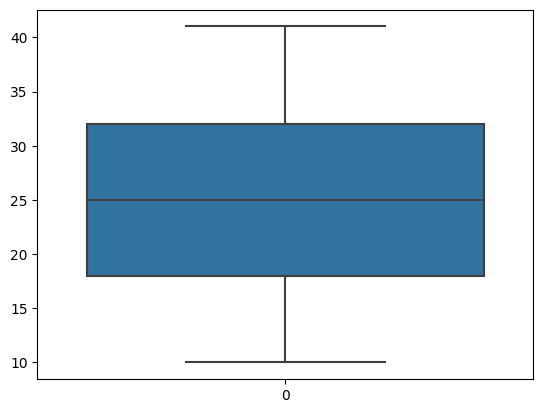

In [149]:
df=df[(df.total_sulfur_dioxide>=ts_01) & (df.total_sulfur_dioxide<=ts_78)]
sns.boxplot(df.total_sulfur_dioxide)

<Axes: >

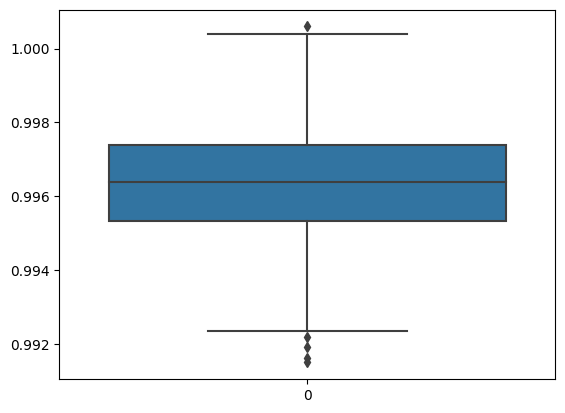

In [150]:
sns.boxplot(df.density) #outlier detcted

In [151]:
#removing outlier
d1 = df.density.quantile(0.25) #Q1
d3 = df.density.quantile(0.75) #Q3
IQR_d = d3 - d1
upper_limit_d = d3+(1.5)*(IQR_d)
lower_limit_d = d1-(1.5)*(IQR_d)
print(d1)
print(d3)
print(IQR_d)
print(upper_limit_d)
print(lower_limit_d)

0.9953375
0.9974
0.002062499999999967
1.00049375
0.9922437500000001


<Axes: >

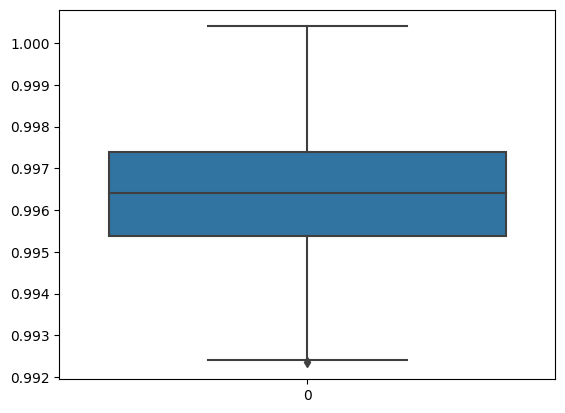

In [152]:
df=df[(df.density<upper_limit_d) & (df.density>lower_limit_d)]
sns.boxplot(df.density)

In [153]:
d_01=df.density.quantile(0.01)
d_99=df.density.quantile(0.99)
print(d_01)
print(d_99)

0.9929036
0.999964


<Axes: >

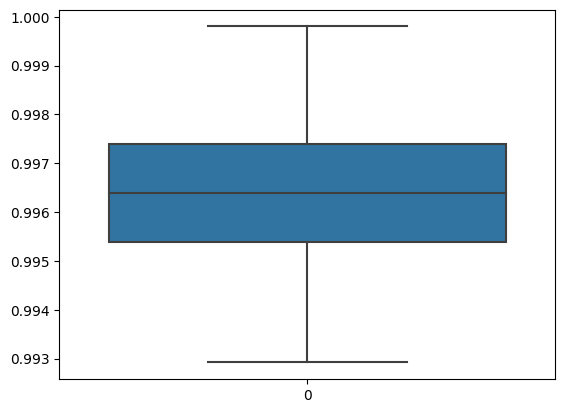

In [154]:
df=df[(df.density>=d_01) & (df.density<=d_99)]
sns.boxplot(df.density)

<Axes: >

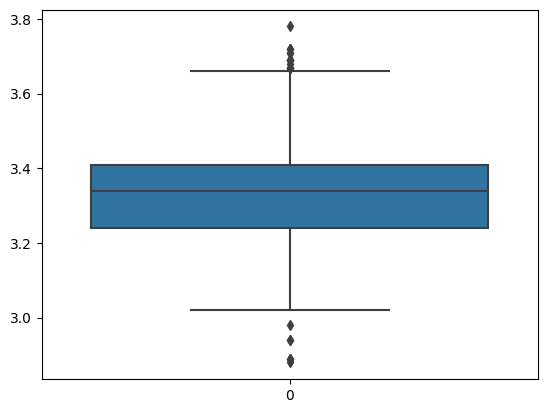

In [155]:
sns.boxplot(df.pH) #outlier detcted

In [156]:
#removing outlier
pH1 = df.pH.quantile(0.25) #Q1
pH3 = df.pH.quantile(0.75) #Q3
IQR_pH = pH3 - pH1
upper_limit_pH = pH3+(1.5)*(IQR_pH)
lower_limit_pH = pH1-(1.5)*(IQR_pH)
print(pH1)
print(pH3)
print(IQR_pH)
print(upper_limit_pH)
print(lower_limit_pH)

3.24
3.41
0.16999999999999993
3.665
2.9850000000000003


<Axes: >

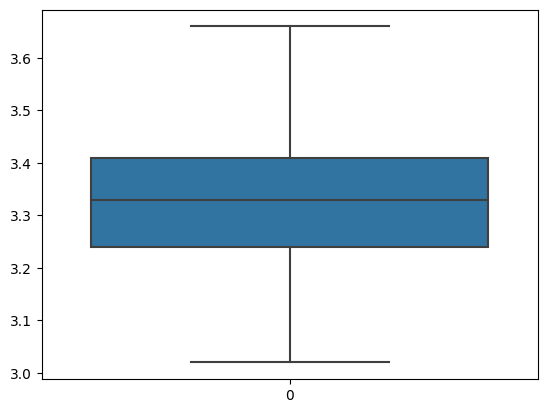

In [158]:
df=df[(df.pH<upper_limit_pH) & (df.pH>lower_limit_pH)]
sns.boxplot(df.pH)

<Axes: >

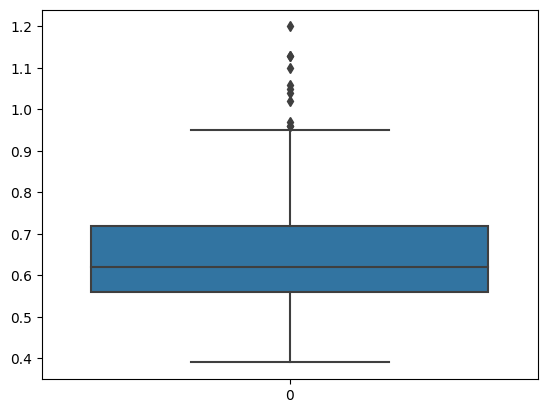

In [159]:
sns.boxplot(df.sulphates) #outlier detcted

In [160]:
su_01=df.sulphates.quantile(0.01)
su_98=df.sulphates.quantile(0.98)
print(su_01)
print(su_98)

0.43
0.9359999999999992


<Axes: >

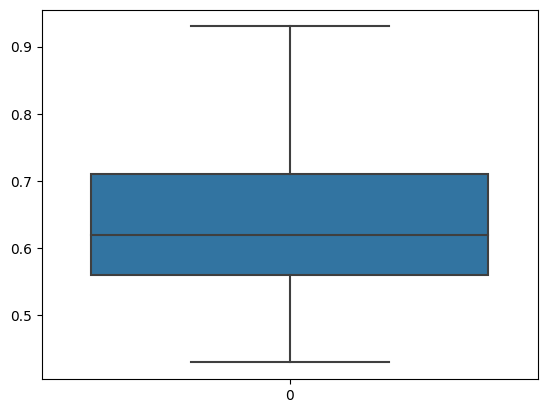

In [161]:
df=df[(df.sulphates>=su_01) & (df.sulphates<=su_98)]
sns.boxplot(df.sulphates)

<Axes: >

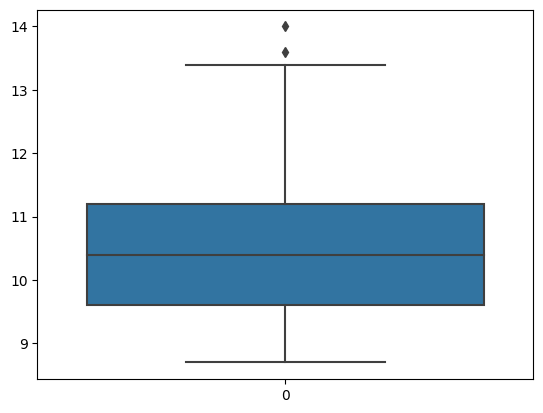

In [162]:
sns.boxplot(df.alcohol) #outlier detcted

In [163]:
#removing outlier
a_01=df.alcohol.quantile(0.01)
a_99=df.alcohol.quantile(0.99)
print(a_01)
print(a_99)

9.0
12.8


<Axes: >

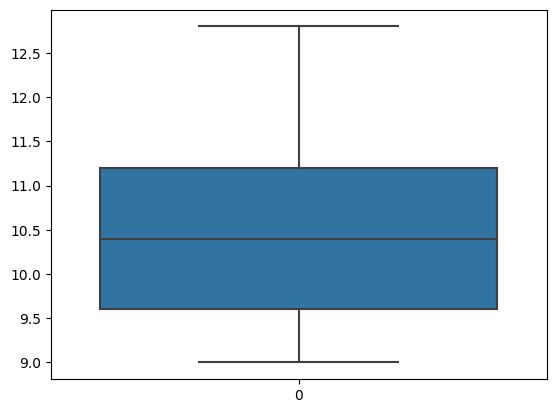

In [164]:
df=df[(df.alcohol>=a_01) & (df.alcohol<=a_99)]
sns.boxplot(df.alcohol)

All outliers are removed

# Task 3 : Machine learning model building

In [165]:
X =df.iloc[:,:-1]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5


In [166]:
Y =df.quality
Y.head()

0     5
4     5
5     5
8     7
22    5
Name: quality, dtype: int64

In [167]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print (Y)

0       0
4       0
5       0
8       1
22      0
       ..
1587    0
1590    0
1592    0
1593    0
1596    0
Name: quality, Length: 564, dtype: int64


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [171]:
X_train.shape

(451, 11)

In [172]:
X_test.shape

(113, 11)

In [173]:
Y_train.shape

(451,)

In [174]:
Y_test.shape

(113,)

# Task 4 : Evaluating the models

Decision tree classifier

In [175]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')


In [177]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [179]:
d_y_predict = model1.predict(X_test)
d_y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [180]:
d_y_predict_train = model1.predict(X_train)

In [181]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Testing Accuracy = ', accuracy_score(Y_test,d_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,d_y_predict_train))

Testing Accuracy =  0.831858407079646
Training Accuracy =  0.9334811529933481


Random forest classifier

In [182]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(n_estimators=200,criterion='entropy')
model2.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [183]:
r_y_predict = model2.predict(X_test)
r_y_predict_train = model2.predict(X_train)

In [184]:
print('Testing Accuracy = ', accuracy_score(Y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,r_y_predict_train))

Testing Accuracy =  0.8584070796460177
Training Accuracy =  1.0


Naive bay's classification model

In [185]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [186]:
y_pred2 = gnb.predict(X_test)
y_pred2

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [187]:
from sklearn.metrics import accuracy_score
gnb_acc=accuracy_score(Y_test,y_pred2)
gnb_acc

0.8495575221238938

# Accuracies of all the algorithms :

Decision tree classifier :83.18%

# Random forest classifier :85.84%

Naive bayesian classification model : 84.95%

# conclusion : Random forest classifier is best suited for wine qualitly test detection

# Task 5: Test with some random observation

In [188]:
input_data = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
prediction = model1.predict([input_data])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

Bad Quality according to decision tree classifier

In [189]:
input_data_2 = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
prediction2 = model2.predict([input_data_2])
prediction2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

Bad quality according to Random forest classifier

In [190]:
input_data_3 = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
prediction3 = gnb.predict([input_data_3])
prediction3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

Array[1] good quality according to naives bayes classifier

# Conclusion : Majority model says that the "Alcohol Quality is bad "

---

